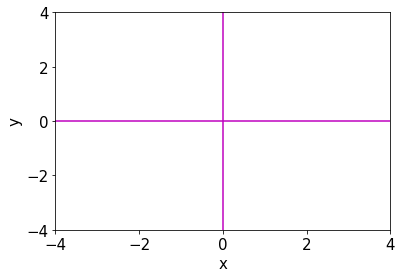

In [1]:
# Program 07a: Animation of a simple curve. Saddle-node bifurcation.
# See Figure 7.2.
# Animation of mu-x**2, as mu increases from mu=-3 to mu=3.
# Type - %matplotlib qt5 - in Console window.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

xmin, xmax = -4, 4
mu_min, mu_max = -3, 3

# Set up the figure.
fig = plt.figure()

ax = plt.axes(xlim=(xmin, xmax), ylim=(xmin, xmax))
line, = ax.plot([], [], lw=2)
ax.plot([xmin, xmax], [0,0], 'm')
ax.plot([0, 0], [xmin, xmax], 'm')

def init():
    line.set_data([], [])
    return line,

# Animate mu-x^**2, where -3<mu<3.
def animate(mu):
    x = np.linspace(xmin, xmax, 100)
    y = mu - x**2
    line.set_data(x, y)
    return line,

bifurcation = FuncAnimation(fig, animate, init_func=init,
                            frames=np.linspace(mu_min, mu_max, 1000),
                            interval=10, blit=True)

plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)

plt.show()

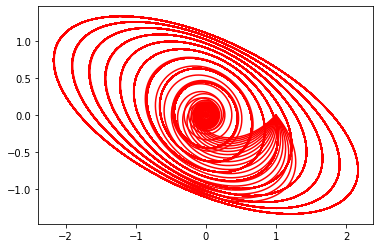

In [2]:
# Program 07b: Animation of a subcritical Hopf Bifurcation.
# See Figure 7.7.

from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
import numpy as np
from scipy.integrate import odeint

fig = plt.figure()
myimages = []

def hopf(x, t):
    return [x[1] + mu*x[0] - x[0] * x[1]**2, mu * x[1] - x[0] -x[1]**3]

time = np.arange(0, 200, 0.01)
x0 = [1, 0]
for mu in np.arange(-1, 1, 0.1):
    xs = odeint(hopf, x0, time)
    imgplot = plt.plot(xs[:, 0], xs[:, 1], 'r-')
    myimages.append(imgplot)

my_anim = ArtistAnimation(fig, myimages, interval=100, blit=False, repeat_delay=100)

plt.show()

C:\Users\dan37\AppData\Roaming\Python\Python39\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


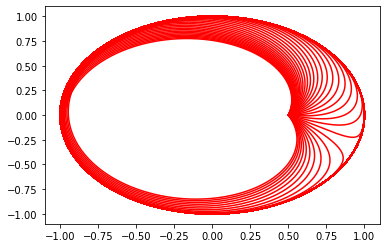

In [3]:
# Program 07c: Animation of a SNIC bifurcation.
# See Figure 7.12.

from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
import numpy as np
from scipy.integrate import odeint

fig = plt.figure()

def snic(x, t):
    return [x[0] * (1 - x[0]**2 - x[1]**2) - x[1] * (1 + mu + x[0]),
            x[1] * (1 - x[0]**2 - x[1]**2) + x[0] * (1 + mu + x[0])]

time = np.arange(0, 200, 0.01)
x0 = [0.5, 0]

myimages = []
for mu in np.arange(-3, 1, 0.1):
    xs = odeint(snic, x0, time)
    imgplot = plt.plot(xs[:, 0], xs[:, 1], 'r-')
    myimages.append(imgplot)

my_anim = ArtistAnimation(fig, myimages, interval=100, blit=False, repeat_delay=100)

plt.show()